In [72]:
#import appropriate modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm

In [17]:
#1)Read in the data
df = pd.read_csv(r'C:\Users\u353822\Documents\GitHub\University-of-Chicago1\University of Chicago\Machine Learning\HW1\bottle.csv', low_memory=False)

In [21]:
#2) Drop NAs
x = df.dropna(how='all')

In [24]:
df.shape

(864863, 74)

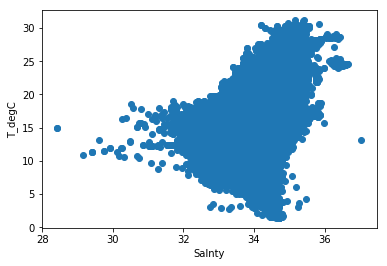

In [25]:
#3) Build the following plots using matplotlib
plt.scatter(df['Salnty'],df['T_degC'])
plt.xlabel("Salnty")
plt.ylabel("T_degC")
plt.show()

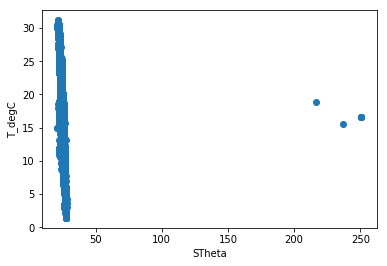

In [4]:
#3) Build the following plots using matplotlib
plt.scatter(df['STheta'],df['T_degC'])
plt.xlabel("STheta")
plt.ylabel("T_degC")
plt.show()

C:\Users\u353822\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


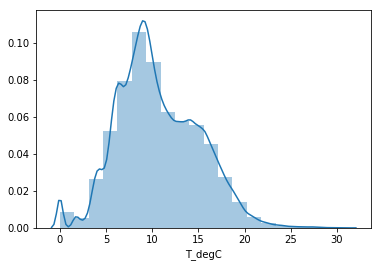

In [51]:
sns.distplot(df['T_degC'],bins=20)


In [26]:
#Remove obvious outliers from step 3b:
#Find columns with outliders such as Depthm using .describe()
df.describe()
df = df[np.abs(df.STheta -df.STheta.mean()) <= (3*df.STheta.std())]

In [116]:
X_test.shape

(267901, 1)

In [102]:
#Part B
y = df['T_degC']
X = df['STheta']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [105]:
#Part C #1 & #2
X = X_train
y = y_train
X_b = np.c_[np.ones((543918,1)), X]  
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[114.98221251  -4.03344261]


In [117]:
#Part C #3
X_new_b = np.c_[np.ones((267901, 1)), X_test]  
y_predict = X_new_b.dot(theta_best)
y_predict

array([ 6.46243903,  7.34576296, 11.68978065, ..., 13.85170589,
        7.2021724 ,  7.05535509])

In [112]:
#Part C #4
#Calculate the following for the test data:
print(skm.mean_squared_error(y_test,y_pred),skm.r2_score(y_test,y_pred),skm.explained_variance_score(y_test,y_pred))

1.2682135300676554 0.9282816588020598 0.9282819196432355


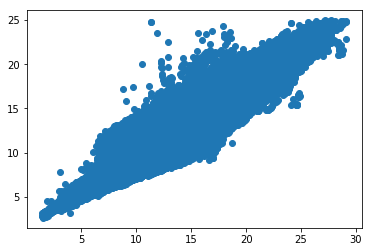

In [118]:
#Part C #5
plt.scatter(y_test,y_predict)
plt.show()

In [107]:
y = df['T_degC']
X = df['STheta']
X=X.reshape(X.shape[0],1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

C:\Users\u353822\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [108]:
#Part D 1#
linreg= LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
#Part D #2Print out the coefficients - we will need to compare these to the output in Part 4
print(linreg.coef_,linreg.intercept_)

[-4.03344261] 114.98221250818527


In [111]:
#Part #D3 Predict T_degC for the test data using the fitted values in b.
y_pred = linreg.predict(X_test)

In [77]:
#Part D #4 Calculate the following for the test data:
print(skm.mean_squared_error(y_test,y_pred),skm.r2_score(y_test,y_pred),skm.explained_variance_score(y_test,y_pred))

1.2682135300676554 0.9282816588020598 0.9282819196432355


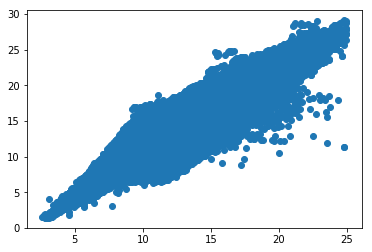

In [78]:
#Part D #5 Scatter Plot 
plt.scatter(y_pred,y_test)
plt.show()

1) Why is it important to have a test set?
It is important to have both a training set and a test set because one must first create the model using the training data. The model will then be used on unutilized data to determine if it is a good fit for the total data set and not overfitting for strictly the training data. 

2) If the normal equation always provides a solution, when would we not want to use it?
If the data is not normal, we can't use he normal equation

3) How might we improve the fit of our models from Part C & D?
Note: There are lots of possible answers to this section - just describe one in detail. 
We could always add more parameters which would add value when predicting our Y parameter.

4) As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff. 
When a model has high bias, it has been over-fitted to the training data. As we increase our variance from a high bias, low variance model, the model begins to underfit our training while the model begins to have a better fit towards the test data.

5) In a linear regression model, how might we reduce bias?
We could use more data for our training to create a better model which is more reflective of a larger portion of the data set. 

6) In a linear regression model, how might we reduce variance
We can reduce variance by adding more parameters to the model which could create a better model, therfore decreasing variance. 